<a href="https://colab.research.google.com/github/hrtywhy/Machine-Learning/blob/main/data-processing%26visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 menggunakan dataset jakarta.csv

### Introduction
DKI dalah ibu kota negara dan kota terbesar di Indonesia. Jakarta merupakan satu-satunya kota di Indonesia yang memiliki status setingkat provinsi. Dengan kepadatan penduduk yang tinggi maka penyebaran corona juga makin masif dan cepat tak terhindarkan. Berikut ini saya mencoba sedikit menganalisis dan memvisualisasikan kasus corona yang terjadi di Jakarta pada bulan Maret 2020.


### Requirements
Disini saya menggunakan beberapa modul dan library dari python, antara lain :


1.   **NumPy**

NumPy adalah sebuah library pada Python yang mana nantinya kita gunakan untuk melakukan operasi vektor dan matriks dengan mengolah array dan array multidimensi.

2.   **Matplotlib**

Matplotlib kita gunakan untuk memvisualisasikan data dengan plot kualitas tinggi dalam berbagai format.

3. **Pandas**

Seperti biasa pandas kita gunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya

4.  **Klib**

Klib berguna untuk mengimpor, membersihkan, menganalisis, dan memproses data sebelumnya.

5. **Warning**

Saya menggunakan modul Warning untuk menghilangkan pesan warning

6. **Plotly**

Plotly Express adalah library visualisasi Python tingkat tinggi baru. Ini adalah pembungkus untuk Plotly.py yang memperlihatkan sintaks sederhana untuk bagan yang  kompleks. 



### Import Library & Modul
Seperti yang sudah saya jelaskan diatas, kita import modul dan library yang akan kita gunakan terlebih dahulu dan tak lupa juga drive tempat kita menyimpan data

In [50]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import klib
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Panggil data terlebih dahulu untuk melakukan check apakah data kita sudah terbaca atau belum. Untuk diketahui, dataset yang digunakan tidak dijelaskan secara detail. Saya akan sedikit menjelaskan kolom yang terdapat pada dataset


*   **date** = merupakan kolom tanggal dari 1 Maret - 27 Maret 2020
*   **odp_process** = singkatan dari orang yang sedang dalam tahap proses pantauan
*   **odp_end** = singkatan dari orang sudah selesai dalam pantauan 
* **odp_total** = jumlah dari odp_proses dan odp_end
* **pdp_process** = singkatan dari pasien yang sedang dalam proses pantauan
* **pdp_end** = singkatan dari pasien yang telah selesaid alam  pantauan
* **pdp_total** = jumlah dari pdp_proses dan pdp_end
* **jakbar** = jakarta barat
* **jakpus** = jakarta pusat
* **jaksel** = jakarta selatan
* **jaktim** = jakarta timur
* **jakut** = jakarta utara
* **outsidejakarta** = diluar jakarta
* **unknown** = tidak diketahui
* **confirmed** = terkonfirmasi
* **released** = rilis
* **deceased** = meninggal
* **hospitalized** = dirumah sakit
* **self_isolated** = isolasi mandiri



In [81]:
df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/jakarta.csv", delimiter=',')
df.tail()

,date,odp_process,odp_end,odp_total,pdp_process,pdp_end,pdp_total,jakbar,jakpus,jaksel,jaktim,jakut,outsidejakarta,unknown,confirmed,released,deceased,hospitalized,self_isolated
22,3/23/2020,434.0,1178.0,1612.0,498.0,267.0,765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,3/24/2020,441.0,1370.0,1811.0,568.0,281.0,849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3/25/2020,463.0,1409.0,1872.0,608.0,291.0,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0,31.0,23.0,NaN,NaN
25,3/26/2020,468.0,1427.0,1895.0,609.0,307.0,916.0,307.0,232.0,459.0,325.0,323.0,359.0,806.0,515.0,29.0,49.0,324.0,113.0
26,3/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.shape

(27, 19)

In [83]:
df.isnull().sum()

date               0
odp_process        1
odp_end            1
odp_total          1
pdp_process        1
pdp_end            1
pdp_total          1
jakbar            26
jakpus            26
jaksel            26
jaktim            26
jakut             26
outsidejakarta    26
unknown           26
confirmed         25
released          25
deceased          25
hospitalized      26
self_isolated     26
dtype: int64

Di sini kita dapat memeriksa kualitas data. Dengan kata lain, seberapa bersih dataset yang kita miliki. 
`missingval_plot()` - memberikan gambaran tingkat tinggi tentang nilai yang hilang dalam kumpulan data. Ini menunjukkan dengan tepat kolom dan baris mana yang harus diperiksa secara lebih rinci. Bagian bawah plot menunjukkan nilai yang hilang (warna hitam) di DataFrame.

GridSpec(6, 6)

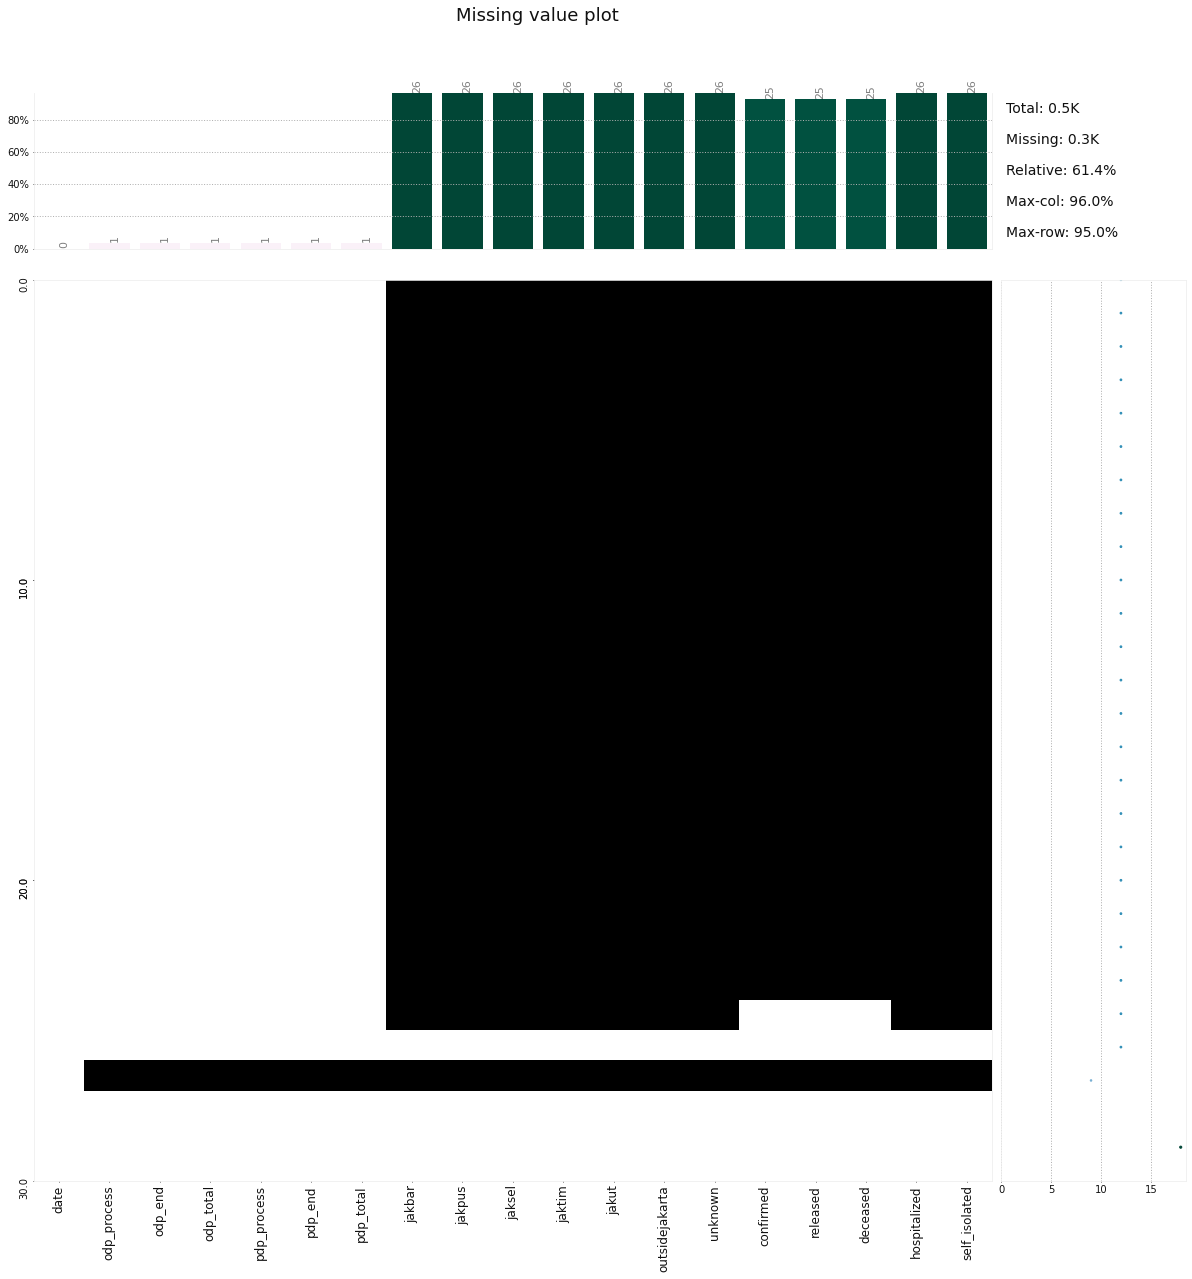

In [84]:
df = pd.read_csv('../content/drive/My Drive/Colab Notebooks/jakarta.csv')
klib.missingval_plot(df)

### Data Cleaning

Seperti yang sudah saya jelaskan diatas, kita menggunakan klib untuk membersihkan data

In [54]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (27, 7)Remaining NAs: 6

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 12
     of which 0 single valued.     Columns: []
Dropped missing values: 309
Reduced memory by at least: 0.0 MB (-nan%)



### Menampilkan Semua Data yang Berkorelasi

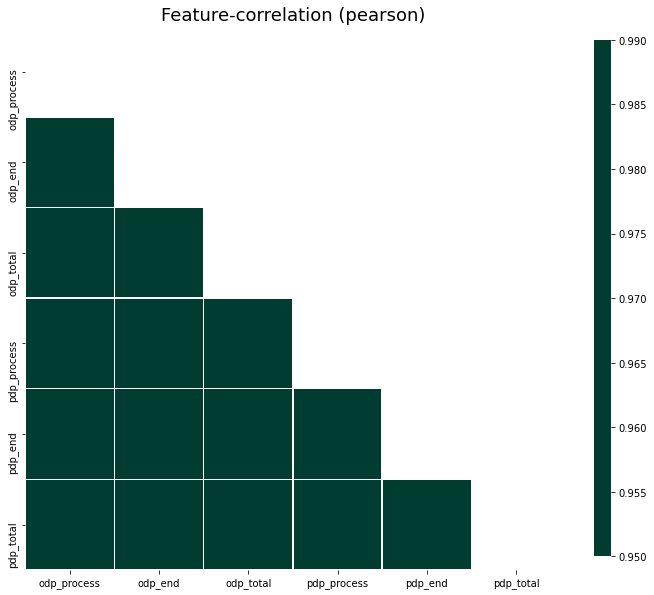

In [55]:
klib.corr_plot(df_cleaned, annot=False)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


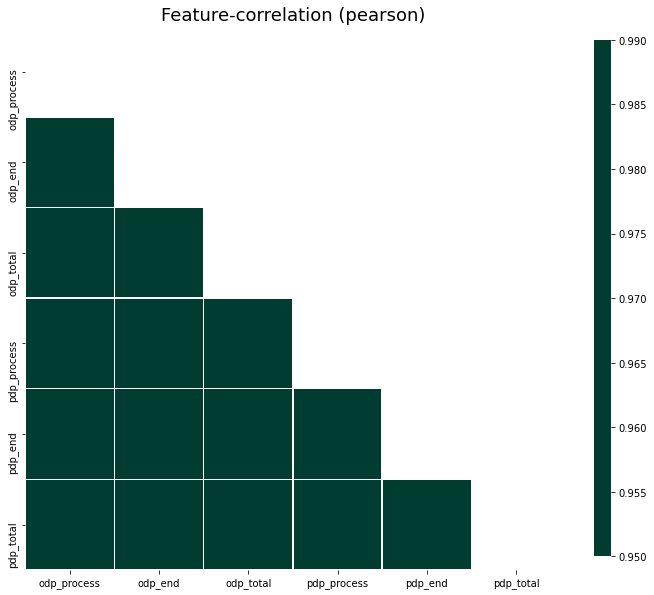

In [56]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

In [57]:
klib.corr_mat(df_cleaned)

,odp_process,odp_end,odp_total,pdp_process,pdp_end,pdp_total
odp_process,1.00,0.94,0.97,0.94,0.95,0.95
odp_end,0.94,1.00,1.00,0.99,0.97,0.99
odp_total,0.97,1.00,1.00,0.99,0.98,0.99
pdp_process,0.94,0.99,0.99,1.00,0.96,1.00
pdp_end,0.95,0.97,0.98,0.96,1.00,0.98
pdp_total,0.95,0.99,0.99,1.00,0.98,1.00


### Distribusi Plot

dari data dibawah kita dapat melihat nilai tengah dan rata-rata angka yang muncul pada tiap kolom

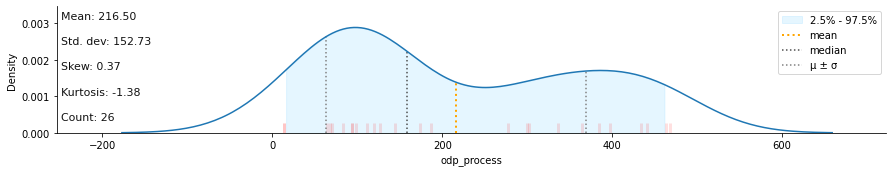

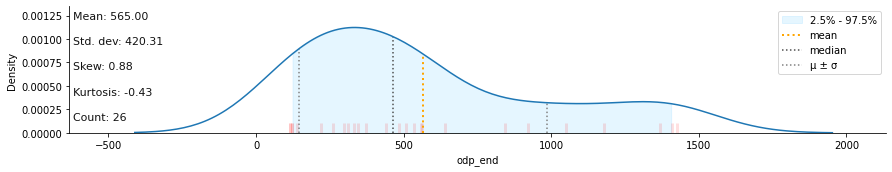

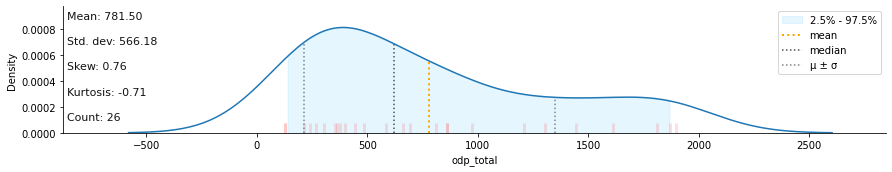

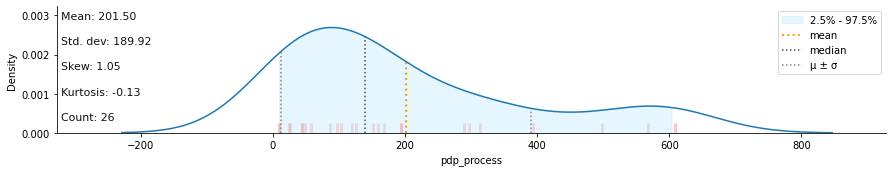

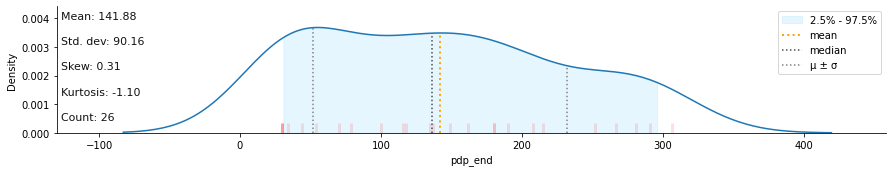

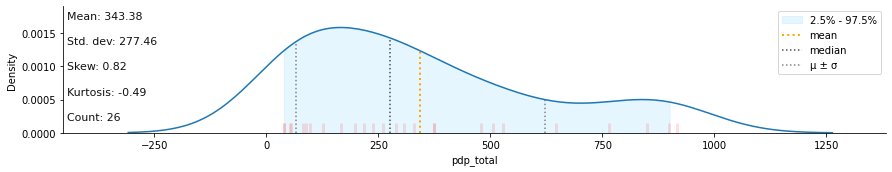

In [58]:
klib.dist_plot(df_cleaned)

### Kategori Plot

GridSpec(6, 1)

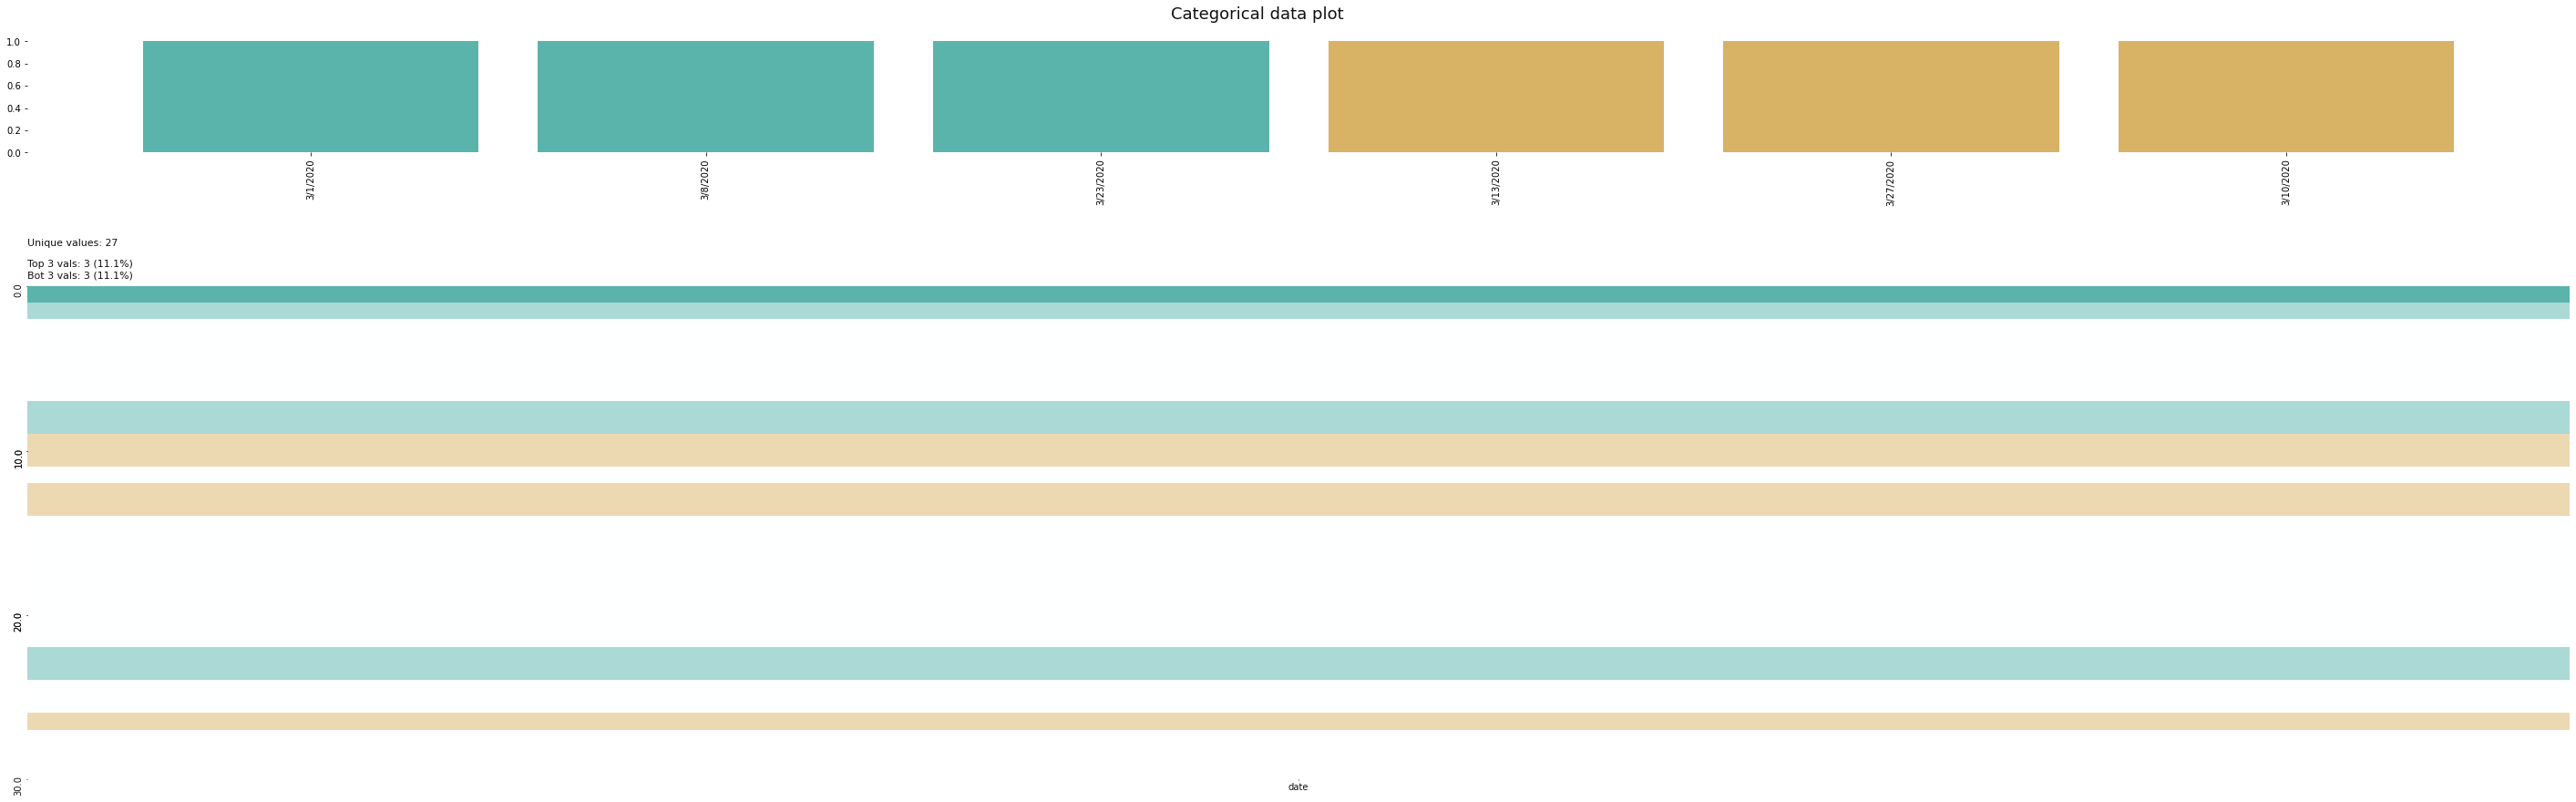

In [59]:
klib.cat_plot(df, figsize=(50,15))

### Korelasi Data

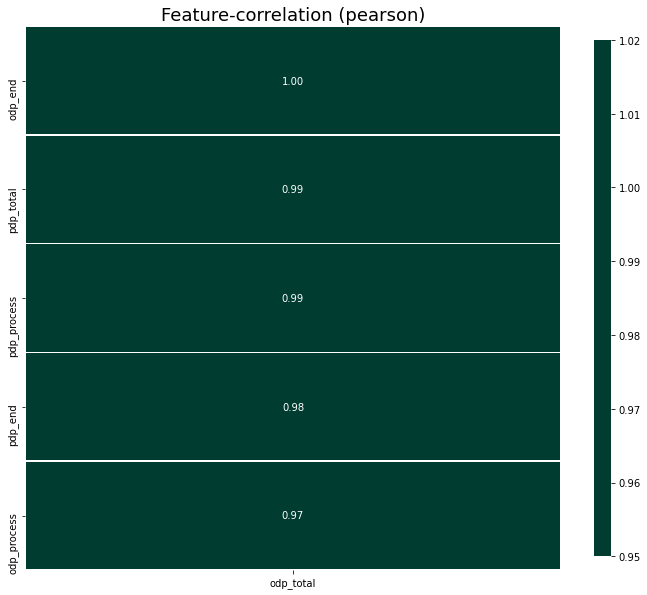

In [80]:
klib.corr_plot(df_cleaned, target='odp_total')

### Visualisasi Data

Untuk memvisualisasikan data disini saya menggunakan plotly express dibagi menjadi 6 bagian yang menunjukkan statistik angka meningtkan

In [62]:
fig = px.bar(df, 
             x='date', y='odp_process',color_discrete_sequence=['blue'],
             title='Proses Orang Dalam Pantauan', text='odp_process')
fig.show()

In [64]:
fig = px.bar(df, 
             x='date', y='odp_end',color_discrete_sequence=['red'],
             title='Orang yang Telah Selesai Dalam Pantauan', text='odp_end')
fig.show()

In [65]:
fig = px.bar(df, 
             x='date', y='odp_total',color_discrete_sequence=['yellow'],
             title='Total Orang Dalam Pantauan', text='odp_total')
fig.show()

In [66]:
fig = px.line(df, x="date", y="pdp_process", color_discrete_sequence=['darksalmon'], 
              title="Pasien Dalam Proses Pantauan")
fig.show()

In [69]:
fig = px.line(df, x="date", y="pdp_end", color_discrete_sequence=['green'], 
              title="Pasien yang Sudah Selesai Dalam Pantauan")
fig.show()

In [72]:
fig = px.line(df, x="date", y="pdp_total", color_discrete_sequence=['purple'], 
              title="Total Pasien Dalam Pantauan")
fig.show()

Kemudian kita tutup dengan **pie chart** menggambarkan seberapa persen dominasi masyarakat yang terkena corona di tiap tiap daerah di Jakarta

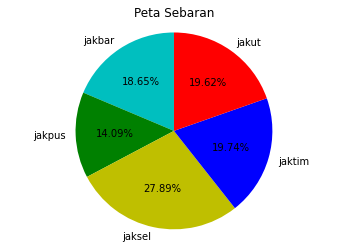

In [85]:
labels = 'jakbar', 'jakpus', 'jaksel','jaktim', 'jakut'
sections = [307, 232, 459, 325, 323]
colors = ['c', 'g', 'y', 'b','r']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0, 0, 0, 0),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Peta Sebaran')
plt.show()

# Task 2 menggunakan dataset patient.csv

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import klib
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/patient.csv", delimiter=',')
df.tail()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
888,889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,892,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
892,893,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
